# Crossref Citation Stats

## Data Provenance

The data was retrieved in August 2018 via the [Crossref API](http://api.crossref.org/works) (the download should include everything at least up to 28 Aug 2018, having started on the 29th taking up to a week). ([The raw responses LZMA zipped](https://doi.org/10.6084/m9.figshare.7081037) take about 35 GB disk space)

## Data Preprocessing

The data was then preprocessed to get calculate some high level stats over the data which are then analysed in this notebook.

The files are available here:
* [crossref-works-summaries-stat.tsv](https://storage.googleapis.com/elife-ml/citations/by-date/2018-08-29/crossref-works-summaries-stat.tsv) - Overall summary stats
* [crossref-works-summaries-by-type-and-publisher-stat.tsv.gz](https://storage.googleapis.com/elife-ml/citations/by-date/2018-08-29/crossref-works-summaries-by-type-and-publisher-stat.tsv.gz) - Summary stats grouped by _type_ and _publisher_ 
* [crossref-works-reference-stat.tsv.gz](https://storage.googleapis.com/elife-ml/citations/by-date/2018-08-29/crossref-works-reference-stat.tsv.gz) - Stats relating to open access (oa) references

Related, but not used for the stats in this notebook:
* [citation links](https://doi.org/10.6084/m9.figshare.7081091)

## Notes

The *reference\_count* and *referenced\_by\_count* are counts provided by Crossref. *num\_references* are the number of references that are actually accessible via the API (i.e. oa).

## Scripts

The scripts can be found in [this repository](https://github.com/elifesciences/datacapsule-crossref), see [README](https://github.com/elifesciences/datacapsule-crossref/blob/analysis/README.md). Using those scripts the data can be updated (but it will take some time to retrieve all of the Crossref data).

Link to this notebook: https://elifesci.org/crossref-data-notebook

In [1]:
%matplotlib inline

In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from IPython.display import Markdown, display

In [3]:
plt.style.use('ggplot')

def printmd(string):
    display(Markdown(string))

In [4]:
data_path = '../data'
summary_stats_filename = 'crossref-works-summaries-stat.tsv'
summary_by_type_and_publisher_stats_filename = 'crossref-works-summaries-by-type-and-publisher-stat.tsv.gz'
reference_stats_filename = 'crossref-works-reference-stat.tsv.gz'

In [5]:
df_summary = pd.read_csv(os.path.join(data_path, summary_stats_filename), sep='\t')

# drop non-numeric stat value 'type' and convert to numeric values
df_summary = df_summary[
    df_summary['stat'] != 'type'
].apply(pd.to_numeric, errors='ignore')

df_summary = df_summary.set_index('stat')
df_summary

,doi,title,reference_count,referenced_by_count,created,type,publisher,container_title,author_count,first_subject_area,subject_areas,has_references,num_references,num_citations_without_doi,num_duplicate_citation_dois,cited_dois,debug
stat,,,,,,,,,,,,,,,,,
count,99999940.0,99999940.0,9.999994e+07,9.999994e+07,99999940.0,99999940.0,99999940.0,99999940.0,99999940.0,99999940.0,99999940.0,9.999994e+07,9.999994e+07,9.999994e+07,9.999994e+07,99999940.0,99999940.0
count_non_zero,NaN,NaN,4.085547e+07,4.239901e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.122099e+07,2.122099e+07,1.954717e+07,5.649730e+05,NaN,NaN
count_numeric,NaN,NaN,9.999994e+07,9.999994e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.999994e+07,9.999994e+07,9.999994e+07,9.999994e+07,NaN,NaN
count_valid,99999940.0,95639475.0,9.999994e+07,9.999994e+07,99999940.0,99981711.0,99996327.0,94418736.0,82374680.0,7092325.0,7092325.0,9.999994e+07,9.999994e+07,9.999994e+07,9.999994e+07,99999940.0,99999940.0
count_zero,NaN,NaN,5.914447e+07,5.760093e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.877895e+07,7.877895e+07,8.045277e+07,9.943497e+07,NaN,NaN
max,NaN,NaN,2.581400e+04,1.351780e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,1.345600e+04,7.242000e+03,1.335000e+03,NaN,NaN
mean,NaN,NaN,1.161114e+01,7.907228e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.122100e-01,6.247038e+00,2.665279e+00,1.541086e-02,NaN,NaN
mean_non_zero,NaN,NaN,2.842001e+01,1.864955e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,2.943799e+01,1.363510e+01,2.727714e+00,NaN,NaN
min,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN


In [6]:
print('total work count: {:,}'.format(int(df_summary['reference_count']['count'])))

total work count: 99,999,940


In [7]:
DEFAULT_NUMBER_FORMAT = '{:,.0f}'
DEFAULT_PERCENTAGE_FORMAT = '{:,.2f}%'
format_count = lambda c, number_format=DEFAULT_NUMBER_FORMAT: number_format.format(c)
format_percentage = lambda c, number_format=DEFAULT_PERCENTAGE_FORMAT: number_format.format(c)

def apply_columns(df, columns, f):
    for c in columns:
        df[c] = df[c].apply(f)
    return df

def format_columns(df):
    for c in df.columns:
        if str(c).startswith('p_'):
            df[c] = df[c].apply(format_percentage)
        else:
            df[c] = df[c].apply(format_count)
    return df

def show_counts(counts, title='', number_format=DEFAULT_NUMBER_FORMAT, **kwargs):
    if isinstance(counts, list):
        df = pd.DataFrame(counts, columns=['what', 'count']).set_index('what')['count']
    else:
        df = counts
    ax = df.plot(kind='bar', **kwargs)
    for p in ax.patches:
        ax.annotate(
            format_count(p.get_height(), number_format=number_format),
            xy=(p.get_x() + p.get_width() / 2, p.get_height()), xycoords="data",
            va="bottom", ha="center"
        )
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: format_count(y))) 
    ax.axes.get_xaxis().set_label_text(title)
    ax.margins(y=0.2)

### Work counts

Out of the *40,855,474* works with references in Crossref, **51.94%** are open (*21,220,990*).

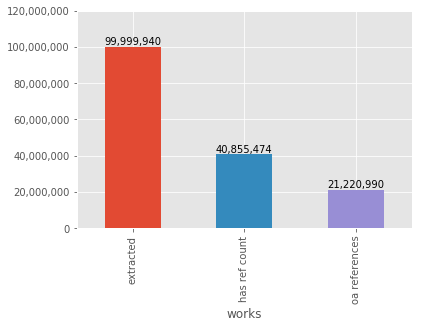

In [8]:
printmd('### Work counts')
printmd('Out of the *{:,}* works with references in Crossref, **{:.2f}%** are open (*{:,}*).'.format(
    int(df_summary['reference_count']['count_non_zero']),
    100.0 * df_summary['has_references']['count_non_zero'] / df_summary['reference_count']['count_non_zero'],
    int(df_summary['has_references']['count_non_zero'])
))

show_counts([
    ['extracted', df_summary['has_references']['count']],
    ['has ref count', df_summary['reference_count']['count_non_zero']],
    ['oa references', df_summary['has_references']['count_non_zero']]
], 'works')

### Reference counts

Out of the *1,161,112,901* references in Crossref, **53.80%** are open (*624,703,391*).

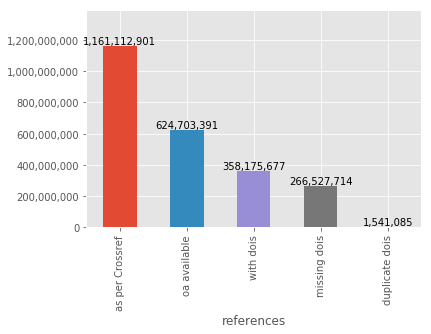

In [9]:
printmd('### Reference counts')
printmd('Out of the *{:,}* references in Crossref, **{:.2f}%** are open (*{:,}*).'.format(
    int(df_summary['reference_count']['sum']),
    100.0 * df_summary['num_references']['sum'] / df_summary['reference_count']['sum'],
    int(df_summary['num_references']['sum'])
))

show_counts([
    ['as per Crossref', df_summary['reference_count']['sum']],
    ['oa available', df_summary['num_references']['sum']],
    ['with dois', df_summary['num_references']['sum'] - df_summary['num_citations_without_doi']['sum']],
    ['missing dois', df_summary['num_citations_without_doi']['sum']],
    ['duplicate dois', df_summary['num_duplicate_citation_dois']['sum']]
], 'references')

In [10]:
printmd('### Reference stats')
df_reference_stat = pd.read_csv(os.path.join(data_path, reference_stats_filename), sep='\t')
df_reference_stat['examples'] = df_reference_stat['examples'].map(lambda x: json.loads(x))
df_reference_stat['examples_without_source'] = df_reference_stat['examples'].map(lambda x: [y[1] for y in x])
df_reference_stat = df_reference_stat.sort_values('count', ascending=False)
df_reference_stat.drop('examples', axis=1).head(10)

### Reference stats

,type,key,count,examples_without_source
769572,total_first_subject_area,NaN,92907615,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
821949,year,NaN,53832993,"[{'journal-title': 'amend. XIII.', 'key': 'S19..."
0,key_combination,author|first-page|journal-title|key|volume|year,50468860,"[{'year': '1979', 'key': '10.1002/(SICI)1096-8..."
1,key_combination,key|unstructured,46638779,"[{'unstructured': 'Canterbury v Spence, 464 F...."
2,key_combination,author|first-page|journal-title|key|unstructur...,35882730,"[{'year': '1990', 'key': '10.1002/(SICI)1096-8..."
3,key_combination,author|key|volume-title|year,29796622,[{'volume-title': 'The genetics of hand malfor...
4,key_combination,article-title|author|first-page|journal-title|...,25572460,[{'article-title': 'Microtubule retraction int...
83278,non_oa_ref_first_subject_area,NaN,18251052,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
769892,total_publisher,Elsevier BV,15632375,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
5,key_combination,author|key|unstructured|volume-title|year,10930475,[{'volume-title': 'Diagnostic and Statistical ...


In [11]:
printmd('### Reference stats are aggregated by different \'types\'')
print('\n'.join(set(df_reference_stat['type'].values)))

### Reference stats are aggregated by different 'types'

non_oa_ref_countainer_title
total_countainer_title
total_first_subject_area
non_oa_ref_first_subject_area
total_publisher
non_oa_ref_created
total_created
key_combination
year
non_oa_ref_publisher


### Count of referenced work by key combinations (populated fields in reference)

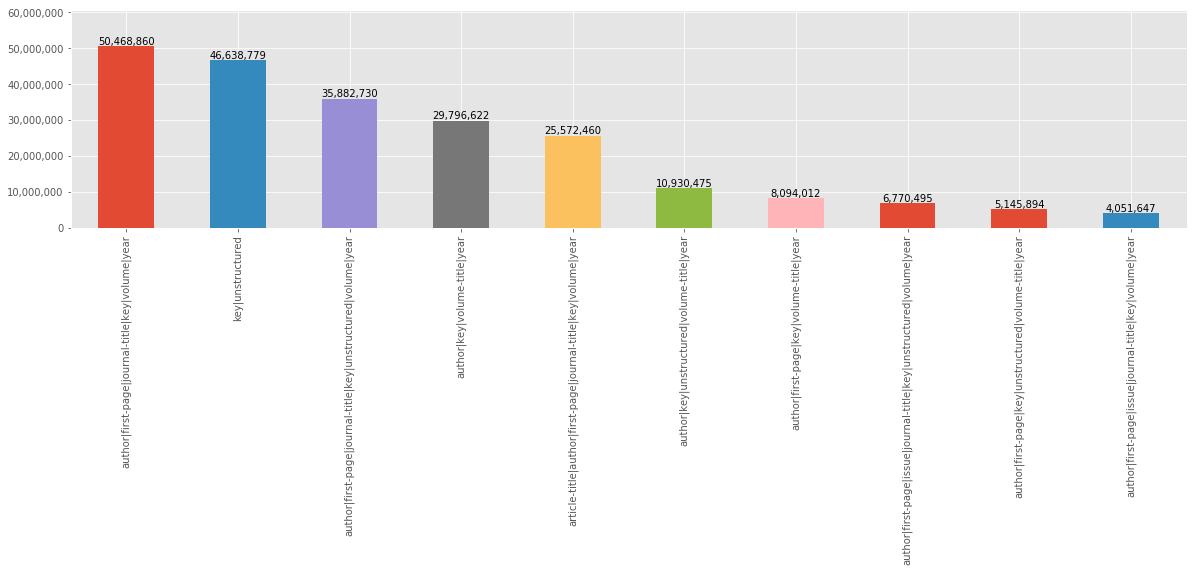

In [12]:
printmd('### Count of referenced work by key combinations (populated fields in reference)')

df_reference_key_combination_stat = (
    df_reference_stat[df_reference_stat['type'] == 'key_combination']
    .drop('type', axis=1)
    .set_index('key')
)
show_counts(df_reference_key_combination_stat['count'].head(10), figsize=(20, 4))

### Count of referenced work by year, sorted descending by year

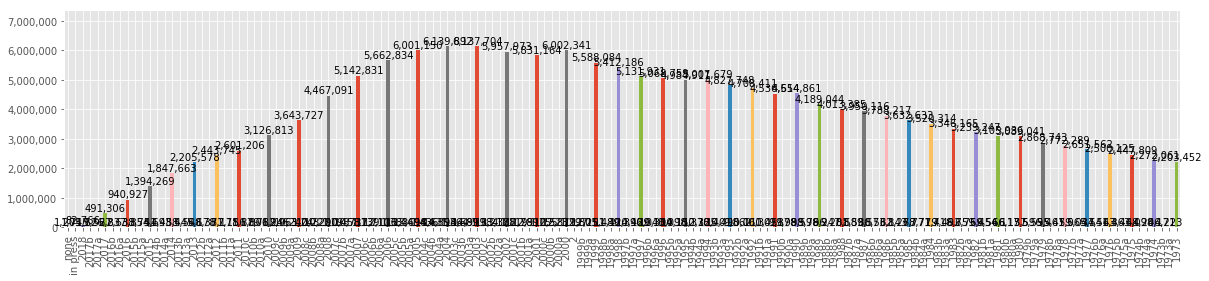

In [13]:
printmd('### Count of referenced work by year, sorted descending by year')

df_reference_year_stat = (
    df_reference_stat[df_reference_stat['type'] == 'year']
    .drop('type', axis=1)
    .sort_values('key', ascending=False)
    .set_index('key')
)
df_reference_year_stat = df_reference_year_stat[df_reference_year_stat['count'] > 1000]
show_counts(df_reference_year_stat['count'].head(150), figsize=(20, 4))

In [14]:
set(df_reference_stat['type'])

{'key_combination',
 'non_oa_ref_countainer_title',
 'non_oa_ref_created',
 'non_oa_ref_first_subject_area',
 'non_oa_ref_publisher',
 'total_countainer_title',
 'total_created',
 'total_first_subject_area',
 'total_publisher',
 'year'}

### Count of non-oa work by publisher, sorted descending

key
Elsevier BV                                                 0.662904
IEEE                                                        0.867197
Institute of Electrical and Electronics Engineers (IEEE)    0.674413
Elsevier                                                    0.554229
Ovid Technologies (Wolters Kluwer Health)                   0.339344
IOP Publishing                                              0.758128
American Chemical Society (ACS)                             0.316995
The Optical Society                                         0.812172
CRC Press                                                   0.495447
Mary Ann Liebert Inc                                        0.829628
Name: count, dtype: float64


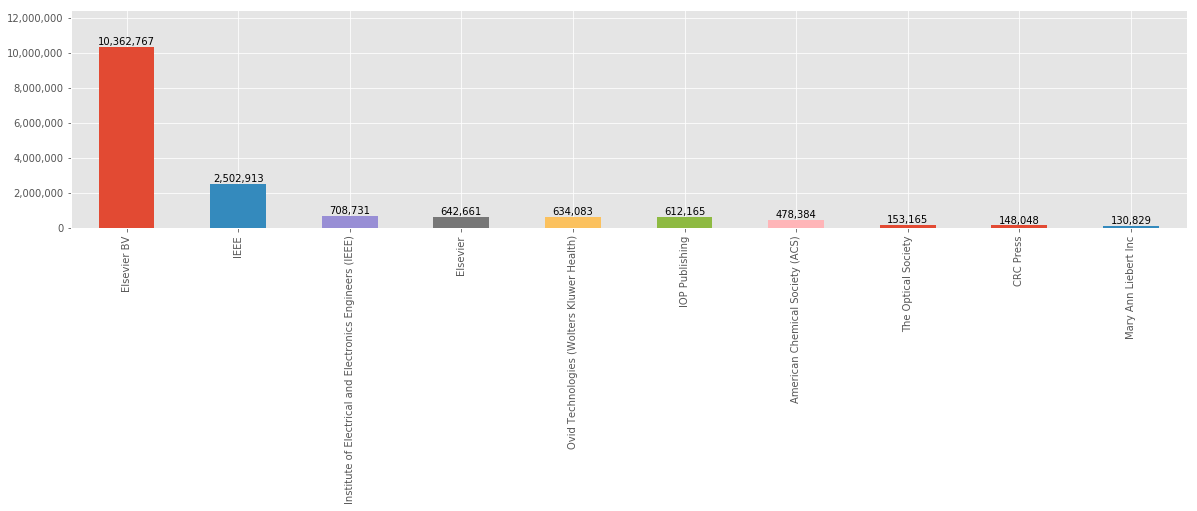

In [15]:
printmd('### Count of non-oa work by publisher, sorted descending')

df_temp = (
    df_reference_stat[df_reference_stat['type'] == 'non_oa_ref_publisher']
    .drop('type', axis=1)
    .set_index('key')
)

df_temp_total = (
    df_reference_stat[df_reference_stat['type'] == 'total_publisher']
    .drop('type', axis=1)
    .set_index('key')
)
# print(df_temp_total.head())
print((df_temp['count'].head(10) / df_temp_total['count']).dropna())
show_counts(df_temp['count'].head(10), figsize=(20, 4))

### Percentage of non-oa work by publisher (>10k works), sorted descending by percentage

key
IEEE                                                        0.867197
Mary Ann Liebert Inc                                        0.829628
The Optical Society                                         0.812172
IOP Publishing                                              0.758128
Institute of Electrical and Electronics Engineers (IEEE)    0.674413
Name: count, dtype: float64


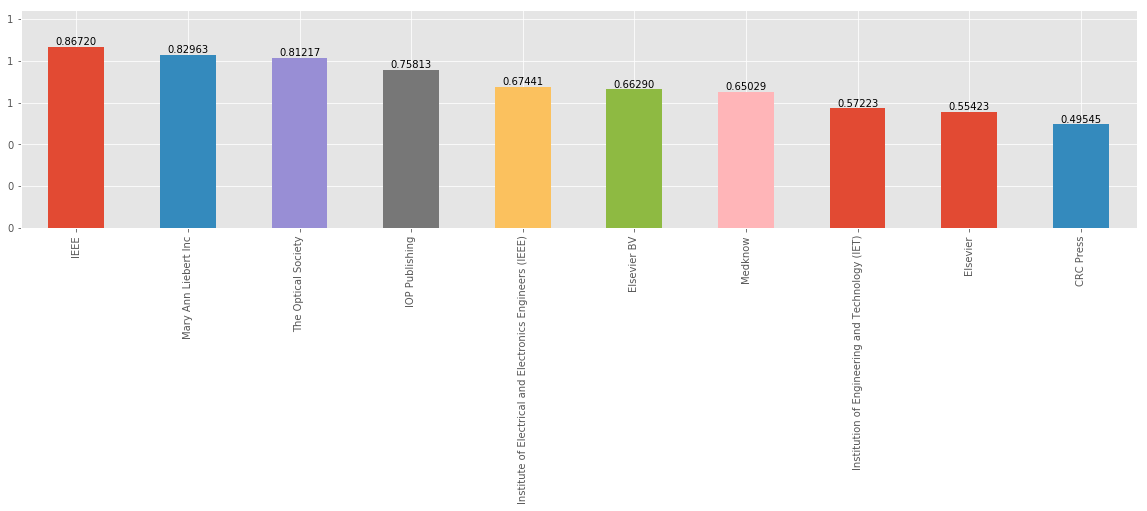

In [16]:
printmd('### Percentage of non-oa work by publisher (>10k works), sorted descending by percentage')

df_temp = (
    df_reference_stat[df_reference_stat['type'] == 'non_oa_ref_publisher']
    .drop('type', axis=1)
    .set_index('key')
)
df_temp2 = (
    df_reference_stat[df_reference_stat['type'] == 'total_publisher']
    .drop('type', axis=1)
    .set_index('key')
)
df_temp = df_temp[df_temp['count'] > 100000]
# df_temp = df_temp[df_temp2['count'] > 10000]
# df_temp2 = df_temp2[df_temp2['count'] > 10000]
df_temp3 = df_temp.copy()
df_temp3['count'] = df_temp3['count'] / df_temp2['count']
print(df_temp3['count'].sort_values(ascending=False).head())
show_counts(df_temp3['count'].sort_values(ascending=False).head(10), number_format='{:,.5f}', figsize=(20, 4))

### Non-oa works by container title

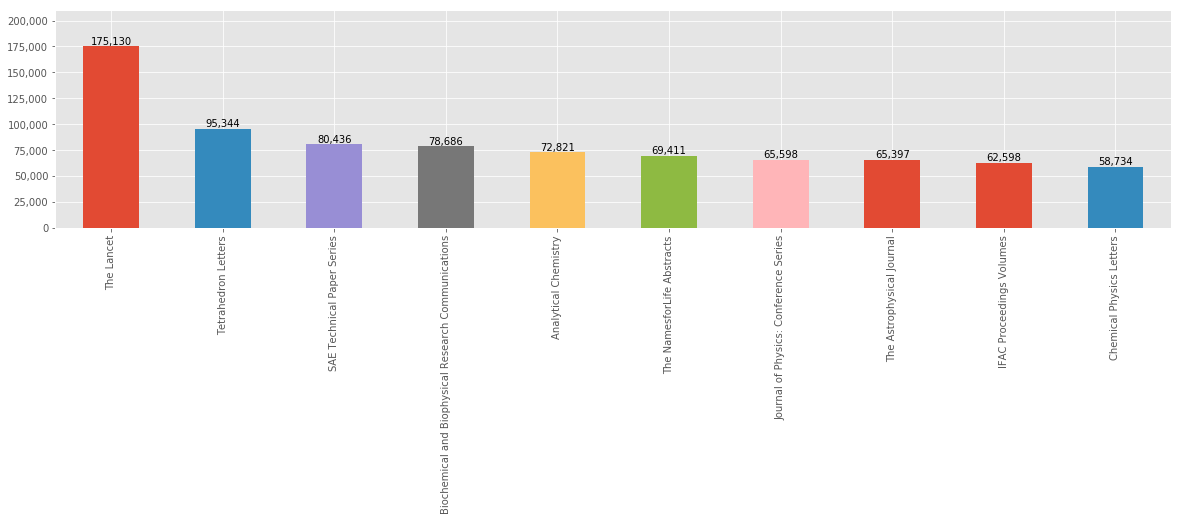

In [17]:
printmd('### Non-oa works by container title')

df_temp = (
    df_reference_stat[df_reference_stat['type'] == 'non_oa_ref_countainer_title']
    .drop('type', axis=1)
    .set_index('key')
)
show_counts(df_temp['count'].head(10), figsize=(20, 4))

### Non-oa works by first subject area

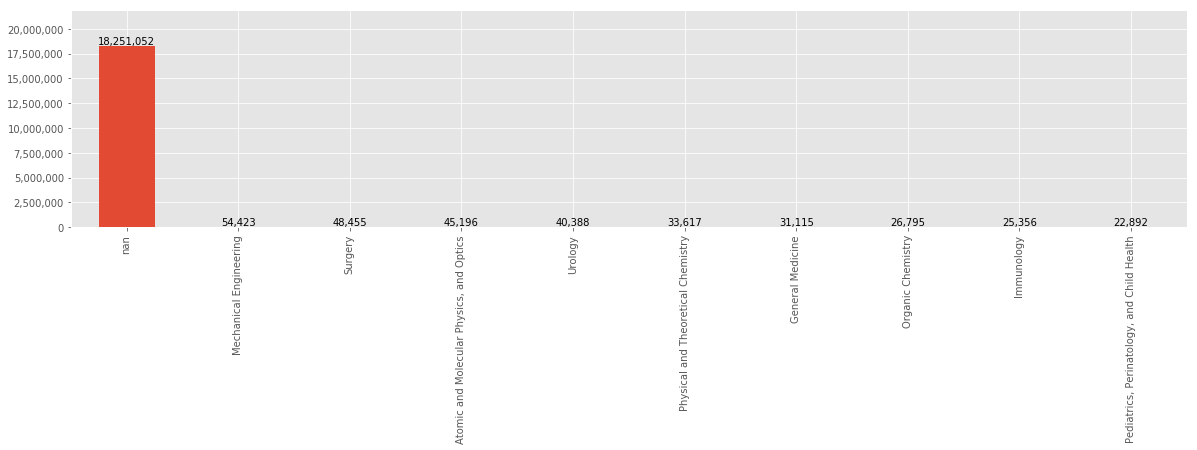

In [18]:
printmd('### Non-oa works by first subject area')

df_temp = (
    df_reference_stat[df_reference_stat['type'] == 'non_oa_ref_first_subject_area']
    .drop('type', axis=1)
    .set_index('key')
)
show_counts(df_temp['count'].head(10), figsize=(20, 4))

### Non-oa works by creation date (year)

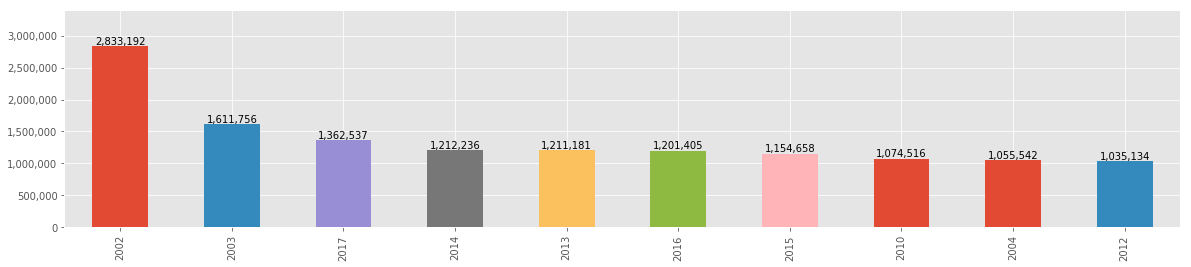

In [19]:
printmd('### Non-oa works by creation date (year)')

df_temp = (
    df_reference_stat[df_reference_stat['type'] == 'non_oa_ref_created']
    .drop('type', axis=1)
    .set_index('key')
)
show_counts(df_temp['count'].head(10), figsize=(20, 4))

## More detailed analysis on the summaries by type and publisher

In [20]:
df_summary_by_type_and_publisher = pd.read_csv(
    os.path.join(data_path, summary_by_type_and_publisher_stats_filename), sep='\t'
).rename(columns={
    'reference_count': 'reference_count_crossref',
    'num_references': 'reference_count_oa'
})

# fill na type and publisher with blank (otherwise causes issues with groupby)
df_summary_by_type_and_publisher[['type', 'publisher']] = (
    df_summary_by_type_and_publisher[['type', 'publisher']].fillna('')
)

# drop non-numeric stat value 'type' and convert to numeric values
df_summary_by_type_and_publisher = df_summary_by_type_and_publisher[
    df_summary_by_type_and_publisher['stat'] != 'type'
].apply(pd.to_numeric, errors='ignore')

df_summary_by_type_and_publisher.head(3)

,type,publisher,stat,doi,title,reference_count_crossref,referenced_by_count,created,container_title,author_count,first_subject_area,subject_areas,has_references,reference_count_oa,num_citations_without_doi,num_duplicate_citation_dois,cited_dois,debug
0,,,count,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1,,,count_non_zero,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
2,,,count_numeric,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,NaN,NaN


In [21]:
printmd('### Work counts by type and publisher')

df_summary_by_type_and_publisher_work_counts = df_summary_by_type_and_publisher[
    df_summary_by_type_and_publisher['stat'] == 'count'
].groupby(['type', 'publisher'])['doi'].sum().sort_values(ascending=False).to_frame('work_count')

df_summary_by_type_and_publisher_non_zero_counts = df_summary_by_type_and_publisher[
    df_summary_by_type_and_publisher['stat'] == 'count_non_zero'
].groupby(['type', 'publisher'])[[
    'reference_count_crossref', 'reference_count_oa'
]].sum().rename(columns={
    'reference_count_crossref': 'has_nonzero_reference_count_crossref',
    'reference_count_oa': 'has_nonzero_reference_count_oa'
})

df_summary_by_type_and_publisher_work_counts = df_summary_by_type_and_publisher_work_counts.merge(
    df_summary_by_type_and_publisher_non_zero_counts, how='outer', left_index=True, right_index=True
).astype(int)

# sanity check
assert int(df_summary_by_type_and_publisher_work_counts.sum()[0]) == int(df_summary['has_references']['count'])

df_summary_by_type_and_publisher_work_counts['p_oa'] = (
    100.0 * df_summary_by_type_and_publisher_work_counts['has_nonzero_reference_count_oa'] /
    df_summary_by_type_and_publisher_work_counts['has_nonzero_reference_count_crossref']
)

format_columns(df_summary_by_type_and_publisher_work_counts.sort_values(
    'work_count', ascending=False
).head())

### Work counts by type and publisher

work_count  \
type                publisher                        
journal-article     Elsevier BV         15,629,611   
                    Wiley                7,591,769   
                    Springer Nature      6,819,427   
                    Informa UK Limited   4,028,444   
proceedings-article IEEE                 2,876,463   

                                       has_nonzero_reference_count_crossref  \
type                publisher                                                 
journal-article     Elsevier BV                                  10,362,767   
                    Wiley                                         5,245,182   
                    Springer Nature                               4,469,607   
                    Informa UK Limited                            2,582,370   
proceedings-article IEEE                                          2,500,760   

                                       has_nonzero_reference_count_oa     p_oa  
type                publisher                                                   
journal-article     Elsevier BV                                     0    0.00%  
                    Wiley                                   5,245,182  100.00%  
                    Springer Nature                         4,469,557  100.00%  
                    Informa UK Limited                      2,565,392   99.34%  
proceedings-article IEEE                                            0    0.00%

In [22]:
printmd('### Total work counts')

(
    df_summary_by_type_and_publisher_work_counts.reset_index()
    .drop(['type', 'publisher'], axis=1)
    .sum(axis=0)
    .to_frame('total')
    .applymap(format_count)
)

### Total work counts

,total
work_count,"99,999,940"
has_nonzero_reference_count_crossref,"40,855,474"
has_nonzero_reference_count_oa,"21,220,990"
p_oa,"81,207"


In [23]:
printmd('### Work counts by type')

df_temp = (
    df_summary_by_type_and_publisher_work_counts.reset_index().groupby('type')
    .sum().sort_values(by='work_count', ascending=False).head()
)

def show_oa_ref_work_percentages_by_type(df):
    for work_type, has_nonzero_reference_count_crossref, has_nonzero_reference_count_oa in zip(
        df.index,
        df['has_nonzero_reference_count_crossref'],
        df['has_nonzero_reference_count_oa']
    ):
        if not has_nonzero_reference_count_crossref:
            continue
        printmd('Out of the *{:,}* works of type *{:}* with references in Crossref, **{:.2f}%** are open (*{:,}*).'.format(
            int(has_nonzero_reference_count_crossref),
            work_type,
            100.0 * has_nonzero_reference_count_oa / has_nonzero_reference_count_crossref,
            int(has_nonzero_reference_count_oa)
        ))

df_temp['p_oa'] = (
    100.0 * df_temp['has_nonzero_reference_count_oa'] / df_temp['has_nonzero_reference_count_crossref']
)

show_oa_ref_work_percentages_by_type(df_temp)

format_columns(df_temp)

### Work counts by type

Out of the *35,527,822* works of type *journal-article* with references in Crossref, **55.40%** are open (*19,681,003*).

Out of the *1,928,208* works of type *book-chapter* with references in Crossref, **52.94%** are open (*1,020,724*).

Out of the *3,110,686* works of type *proceedings-article* with references in Crossref, **9.97%** are open (*310,234*).

Out of the *10* works of type *component* with references in Crossref, **10.00%** are open (*1*).

Out of the *69,632* works of type *dataset* with references in Crossref, **0.02%** are open (*12*).

,work_count,has_nonzero_reference_count_crossref,has_nonzero_reference_count_oa,p_oa
type,,,,
journal-article,"73,616,052","35,527,822","19,681,003",55.40%
book-chapter,"11,639,137","1,928,208","1,020,724",52.94%
proceedings-article,"5,389,574","3,110,686","310,234",9.97%
component,"3,368,405",10,1,10.00%
dataset,"1,691,619","69,632",12,0.02%


In [24]:
printmd('### Journal vs non-journal-article type')

def type_to_journal_non_journal_article(df):
    df = df.copy()
    df['type'] = df['type'].map(lambda x: 'non-journal-article' if x != 'journal-article' else x)
    return df

df_temp = (
    type_to_journal_non_journal_article(
        df_summary_by_type_and_publisher_work_counts.reset_index()
    )
    .groupby('type')
    .sum().sort_values(by='work_count', ascending=False).head()
)

df_temp['p_oa'] = 100.0 * df_temp['has_nonzero_reference_count_oa'] / df_temp['has_nonzero_reference_count_crossref']

show_oa_ref_work_percentages_by_type(df_temp)

format_columns(df_temp)

### Journal vs non-journal-article type

Out of the *35,527,822* works of type *journal-article* with references in Crossref, **55.40%** are open (*19,681,003*).

Out of the *5,327,652* works of type *non-journal-article* with references in Crossref, **28.91%** are open (*1,539,987*).

,work_count,has_nonzero_reference_count_crossref,has_nonzero_reference_count_oa,p_oa
type,,,,
journal-article,"73,616,052","35,527,822","19,681,003",55.40%
non-journal-article,"26,383,888","5,327,652","1,539,987",28.91%


In [25]:
printmd('### By publisher')

def select_top_publishers(df, count=5):
    top_publishers = (
        df.groupby('publisher').sum()
        .sort_values(by='work_count', ascending=False)
        .index.values
    )
    return df[df['publisher'].isin(top_publishers[:count])]

df_temp = (
    type_to_journal_non_journal_article(
        select_top_publishers(df_summary_by_type_and_publisher_work_counts.reset_index())
    )
    .groupby(['type', 'publisher'])
    .sum().sort_values(by='work_count', ascending=False)
)

df_temp['p_oa'] = (
    100.0 * df_temp['has_nonzero_reference_count_oa'] / df_temp['has_nonzero_reference_count_crossref']
)

format_columns(df_temp)

### By publisher

work_count  \
type                publisher                        
journal-article     Elsevier BV         15,629,611   
                    Wiley                7,591,769   
                    Springer Nature      6,819,427   
                    Informa UK Limited   4,028,444   
non-journal-article IEEE                 2,886,210   
                    Wiley                  336,751   
                    Springer Nature         20,388   
                    Informa UK Limited       3,064   
                    Elsevier BV              2,764   

                                       has_nonzero_reference_count_crossref  \
type                publisher                                                 
journal-article     Elsevier BV                                  10,362,767   
                    Wiley                                         5,245,182   
                    Springer Nature                               4,469,607   
                    Informa UK Limited                            2,582,370   
non-journal-article IEEE                                          2,502,913   
                    Wiley                                               130   
                    Springer Nature                                       0   
                    Informa UK Limited                                    0   
                    Elsevier BV                                           0   

                                       has_nonzero_reference_count_oa     p_oa  
type                publisher                                                   
journal-article     Elsevier BV                                     0    0.00%  
                    Wiley                                   5,245,182  100.00%  
                    Springer Nature                         4,469,557  100.00%  
                    Informa UK Limited                      2,565,392   99.34%  
non-journal-article IEEE                                            0    0.00%  
                    Wiley                                         130  100.00%  
                    Springer Nature                                 0     nan%  
                    Informa UK Limited                              0     nan%  
                    Elsevier BV                                     0     nan%

In [26]:
printmd('### By normalised publisher')

def normalise_publisher(df):
    elsevier_names = [
        s for s in df['publisher'].unique()
        if not pd.isnull(s) and 'elsevier' in s.lower()
    ]
    return df.replace({
        'publisher': {s: 'Elsevier (all)' for s in elsevier_names}
    })

df_temp = (
    select_top_publishers(normalise_publisher(type_to_journal_non_journal_article(
        df_summary_by_type_and_publisher_work_counts.reset_index()
    )))
    .groupby(['type', 'publisher'])
    .sum().sort_values(by='work_count', ascending=False)
)

df_temp['p_oa'] = (
    100.0 * df_temp['has_nonzero_reference_count_oa'] / df_temp['has_nonzero_reference_count_crossref']
)

format_columns(df_temp)

### By normalised publisher

work_count  \
type                publisher                        
journal-article     Elsevier (all)      15,629,611   
                    Wiley                7,591,769   
                    Springer Nature      6,819,427   
                    Informa UK Limited   4,028,444   
non-journal-article IEEE                 2,886,210   
                    Elsevier (all)       1,162,512   
                    Wiley                  336,751   
                    Springer Nature         20,388   
                    Informa UK Limited       3,064   

                                       has_nonzero_reference_count_crossref  \
type                publisher                                                 
journal-article     Elsevier (all)                               10,362,767   
                    Wiley                                         5,245,182   
                    Springer Nature                               4,469,607   
                    Informa UK Limited                            2,582,370   
non-journal-article IEEE                                          2,502,913   
                    Elsevier (all)                                  643,078   
                    Wiley                                               130   
                    Springer Nature                                       0   
                    Informa UK Limited                                    0   

                                       has_nonzero_reference_count_oa     p_oa  
type                publisher                                                   
journal-article     Elsevier (all)                                  0    0.00%  
                    Wiley                                   5,245,182  100.00%  
                    Springer Nature                         4,469,557  100.00%  
                    Informa UK Limited                      2,565,392   99.34%  
non-journal-article IEEE                                            0    0.00%  
                    Elsevier (all)                                417    0.06%  
                    Wiley                                         130  100.00%  
                    Springer Nature                                 0     nan%  
                    Informa UK Limited                              0     nan%

In [27]:
printmd('### Sanity check, the grouped summary should equal the ungrouped summary')

df_summary_by_type_and_publisher_sums = df_summary_by_type_and_publisher[
    df_summary_by_type_and_publisher['stat'] == 'sum'
]
total_reference_count_according_to_crossref = df_summary_by_type_and_publisher_sums['reference_count_crossref'].sum()
assert total_reference_count_according_to_crossref == df_summary['reference_count']['sum']
(
    df_summary_by_type_and_publisher_sums[['reference_count_crossref', 'reference_count_oa']]
    .sum()
    .map(format_count)
    .to_frame('sum')
)

### Sanity check, the grouped summary should equal the ungrouped summary

,sum
reference_count_crossref,"1,161,112,901"
reference_count_oa,"624,703,391"


In [28]:
printmd('### Total references by type')

df_temp = (
    df_summary_by_type_and_publisher_sums.groupby('type')
    [['reference_count_crossref', 'reference_count_oa']]
    .sum()
    .sort_values('reference_count_crossref', ascending=False)
    .head()
)

df_temp['p_oa'] = (
    100.0 * df_temp['reference_count_oa'] / df_temp['reference_count_crossref']
)

format_columns(df_temp)

### Total references by type

,reference_count_crossref,reference_count_oa,p_oa
type,,,
journal-article,"1,026,914,518","574,483,040",55.94%
book-chapter,"86,104,828","38,449,303",44.65%
proceedings-article,"40,943,346","4,990,826",12.19%
reference-entry,"6,205,946","6,205,946",100.00%
other,"444,718","319,793",71.91%


In [29]:
printmd('### Publishers with the highest amount of references')

df_temp = (
    df_summary_by_type_and_publisher_sums.groupby('publisher')
    .sum()[['reference_count_crossref', 'reference_count_oa']]
    .sort_values(by='reference_count_crossref', ascending=False)
).head()

df_temp['p_oa'] = (
    100.0 * df_temp['reference_count_oa'] / df_temp['reference_count_crossref']
)

format_columns(df_temp)

### Publishers with the highest amount of references

,reference_count_crossref,reference_count_oa,p_oa
publisher,,,
Elsevier BV,"315,219,566",0,0.00%
Wiley,"140,886,634","140,886,634",100.00%
Springer Nature,"129,564,191","129,561,997",100.00%
Informa UK Limited,"73,266,645","72,889,626",99.49%
Elsevier,"37,909,896","14,856",0.04%


In [30]:
printmd('### Elsevier uses mutliple names, treat them as one')

elsevier_names = [
    s for s in df_summary_by_type_and_publisher_sums['publisher'].unique()
    if not pd.isnull(s) and 'elsevier' in s.lower()
]
printmd('* %s' % '\n* '.join(elsevier_names))
df_summary_by_type_and_publisher_sums_merged_publisher = (
    df_summary_by_type_and_publisher_sums.replace({
        'publisher': {s: 'Elsevier (all)' for s in elsevier_names}
    })
)

### Elsevier uses mutliple names, treat them as one

* Elsevier
* Elsevier Inc.
* Elsevier, Germany
* Elsevier BV
* "Elsevier",
* Elsevier Masson
* Elsevier Pub. Co.
* Elsevier Pub. Co.,
* Elsevier,
* Publishing company "Elsevier,",
* Elsevier IFAC
* Elsevier, IFAC
* IFAC, Elsevier

In [31]:
printmd('### Publishers with the highest amount of references - this time with merged publisher names')

df_temp = (
    df_summary_by_type_and_publisher_sums_merged_publisher.groupby('publisher')
    .sum()[['reference_count_crossref', 'reference_count_oa']]
    .sort_values(by='reference_count_crossref', ascending=False)
).head()

df_temp['p_oa'] = (
    100.0 * df_temp['reference_count_oa'] / df_temp['reference_count_crossref']
)

format_columns(df_temp)

### Publishers with the highest amount of references - this time with merged publisher names

,reference_count_crossref,reference_count_oa,p_oa
publisher,,,
Elsevier (all),"353,129,462","14,856",0.00%
Wiley,"140,886,634","140,886,634",100.00%
Springer Nature,"129,564,191","129,561,997",100.00%
Informa UK Limited,"73,266,645","72,889,626",99.49%
IEEE,"32,298,308",0,0.00%


In [32]:
printmd('### Publishers with the highest amount of references (by type) - this time with merged publisher names')

df_temp = (
    df_summary_by_type_and_publisher_sums_merged_publisher.groupby(['type', 'publisher'])
    .sum()[['reference_count_crossref', 'reference_count_oa']]
    .sort_values(by='reference_count_crossref', ascending=False)
).head()

df_temp['p_oa'] = (
    100.0 * df_temp['reference_count_oa'] / df_temp['reference_count_crossref']
)

format_columns(df_temp)

### Publishers with the highest amount of references (by type) - this time with merged publisher names

reference_count_crossref  \
type            publisher                                     
journal-article Elsevier (all)                  315,219,566   
                Wiley                           140,873,461   
                Springer Nature                 129,564,191   
                Informa UK Limited               73,266,645   
book-chapter    Elsevier (all)                   37,909,896   

                                   reference_count_oa     p_oa  
type            publisher                                       
journal-article Elsevier (all)                      0    0.00%  
                Wiley                     140,873,461  100.00%  
                Springer Nature           129,561,997  100.00%  
                Informa UK Limited         72,889,626   99.49%  
book-chapter    Elsevier (all)                 14,856    0.04%